# PCA with EC-ERA5

In the [first notebook](https://github.com/tingsyo/taiwan_weather_types/blob/main/notebook/01_PCA_based_Clustering.ipynb) we performed clustering with PCA results derived from NECT-CFSR dataset, and here we will do similar analysis with the EC-ERA5 dataset.

The ERA5 dataset was preprocess as single variable in netCDF4 format (.nc file). The data domain focuses on East Asia (10-50'N, 100-140'E) with a resolution of (161, 161) (0.25 degree interval). Scripts to perform the PCA analysis were [`ipca_era5.py`](https://github.com/tingsyo/taiwan_weather_types/blob/main/utils/ipca_era5.py) and [`run_ipca_era5.sh`](https://github.com/tingsyo/taiwan_weather_types/blob/main/utils/run_era5_ipca.sh).

In the following we will just use the results of PCA.

## How Many PCs to Use?

We first look at the results.

In [3]:
import joblib
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
import pandas as pd
# Defined Parameters
MODEL_PATH = '../data/pca_era5'
LAYERS = ['mslp', 'q925','t925','u925','v925','q850','t850','u850','v850','q700','t700','u700','v700','h500','u200','v200']
print(len(LAYERS))
ts = pd.read_csv('../data/era5_timestamp.csv')
ts.head()

16


,timestamp,year,month,day,hour
0,1979010100,1979,1,1,0
1,1979010200,1979,1,2,0
2,1979010300,1979,1,3,0
3,1979010400,1979,1,4,0
4,1979010500,1979,1,5,0


In [4]:
MODELPATH = '../data/pca_era5/model/'
MODELSUFFIX = '.pca.mod'

aevr = {}

for l in LAYERS:
    print(l)
    mod = joblib.load(MODELPATH + l + MODELSUFFIX)
    aevr[l] = np.cumsum(mod.explained_variance_ratio_)

aevr = pd.DataFrame(aevr)
print(aevr.shape)
print(aevr.head())

mslp
q925
t925
u925
v925
q850
t850
u850
v850
q700
t700
u700
v700
h500
u200
v200
(50, 16)
       mslp      q925      t925      u925      v925      q850      t850  \
0  0.752666  0.758323  0.886431  0.284896  0.266075  0.639308  0.870001   
1  0.835313  0.797282  0.916141  0.409084  0.391219  0.678678  0.907664   
2  0.876355  0.825127  0.931504  0.481075  0.468564  0.716471  0.926042   
3  0.903884  0.843987  0.942943  0.535661  0.536091  0.743922  0.940578   
4  0.924845  0.854646  0.951360  0.581806  0.579996  0.760296  0.949959   

       u850      v850      q700      t700      u700      v700      h500  \
0  0.237785  0.187598  0.476895  0.855632  0.277717  0.160897  0.844694   
1  0.364797  0.315505  0.540291  0.902149  0.410175  0.312108  0.895342   
2  0.432845  0.392610  0.586396  0.924634  0.491519  0.395928  0.929904   
3  0.490225  0.459671  0.619806  0.941892  0.553214  0.457532  0.949184   
4  0.541735  0.508932  0.647436  0.951769  0.592617  0.509753  0.960285   

       u2

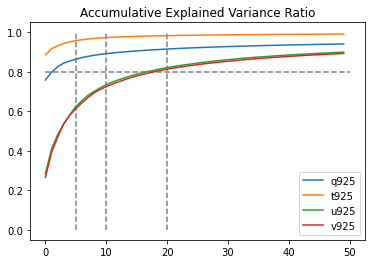

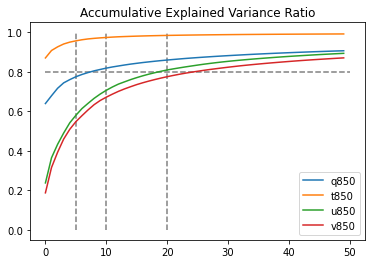

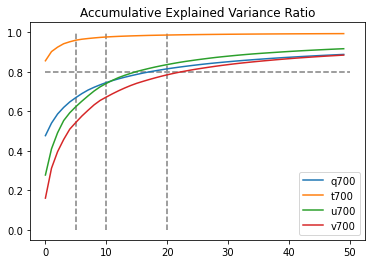

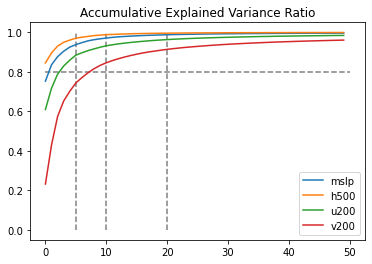

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

layer_group = [['q925','t925','u925','v925'],
               ['q850','t850','u850','v850'],
               ['q700','t700','u700','v700'],
               ['mslp','h500','u200','v200']]

for g in layer_group:
    tmp = aevr.loc[:,g]
    plt.figure(figsize=(6,4))
    plt.plot(tmp)
    plt.hlines(0.8, 0, 50, colors='grey', linestyles='dashed')
    plt.vlines(5, 0, 1, colors='grey', linestyles='dashed')
    plt.vlines(10, 0, 1, colors='grey', linestyles='dashed')
    plt.vlines(20, 0, 1, colors='grey', linestyles='dashed')
    plt.legend(tmp.columns)
    plt.title('Accumulative Explained Variance Ratio')
    plt.show()